In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
#import tensorflow as tf
%matplotlib inline

## Forward Runs 

In [9]:
# gt 1 
folder='cq_grt_riskier_clust1.5_cn15_tiny_tmp0.1_100steps'
which=0
crystals = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*crystals*'))[which])
aliens = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*alien_col*'))[which])
asteroids = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*asteroid*'))[which])
df1 = pd.DataFrame(data=np.vstack((crystals,asteroids,aliens)).T,columns=['crystals','asteroids','aliens'])

# gt 1 
folder='cq_grt_safer_clust1.5_cn15_tiny_tmp0.1_100steps'
which=0
crystals = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*crystals*'))[which])
aliens = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*alien_col*'))[which])
asteroids = np.loadtxt(sorted(glob.glob('../dqn/'+folder+'/gym/*asteroid*'))[which])
df2 = pd.DataFrame(data=np.vstack((crystals,asteroids,aliens)).T,columns=['crystals','asteroids','aliens'])




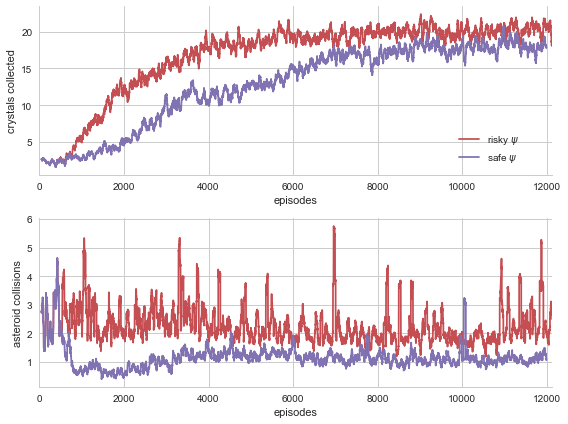

In [10]:
sns.set_style("whitegrid")

fig,axes = plt.subplots(2,1,figsize=(8,6))

# plot 
plt.sca(axes[0])
df1['crystals'].rolling(window=50).mean().plot(c=sns.color_palette()[2],label='risky $\psi$')
df2['crystals'].rolling(window=50).mean().plot(c=sns.color_palette()[3],label='safe $\psi$')
ax = plt.gca()
sns.despine()
ax.set_xlabel('episodes')
plt.legend(loc=2,bbox_to_anchor=[0.8,0.3])
#ax.set_xlim(xlim)
ax.set_ylabel('crystals collected')
#ax.set_ylim(ylim)

plt.sca(axes[1])
df1['asteroids'].rolling(window=50).mean().plot(c=sns.color_palette()[2])
df2['asteroids'].rolling(window=50).mean().plot(c=sns.color_palette()[3])
ax = plt.gca()
#ax.set_title('asteroids')
ax.set_ylabel('asteroid collisions')
sns.despine()
ax.set_xlabel('episodes')
plt.tight_layout()
plt.savefig('../paper/dqn1.png',dpi=300,bbox_inches='tight')

## Parameter Recovery 

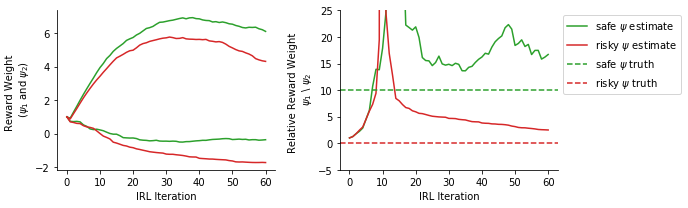

In [80]:
# load data 
phi_r = np.loadtxt('../dqn/cq_irl_riskier_clust1.5_cn15_tiny_tmp0.1_100steps/gym/phis.txt')
phi_s = np.loadtxt('../dqn/cq_irl_safer_clust1.5_cn15_tiny_tmp0.1_100steps/gym/phis.txt')

#
fig,axes = plt.subplots(1,2,figsize=(8,3))

# plot 1
plt.sca(axes[0])
plt.plot(phi_r[0,:].T,linestyle='-', c=sns.color_palette()[2],label='risky $\psi$')
plt.plot(phi_r[1,:].T,linestyle='-', c=sns.color_palette()[2])
plt.plot(phi_s[0,:].T,linestyle='-', c=sns.color_palette()[3],label='safe $\psi$')
plt.plot(phi_s[1,:].T,linestyle='-', c=sns.color_palette()[3])
plt.xlabel('IRL Iteration')
plt.ylabel('Reward Weight \n ($\psi_1$ and $\psi_2$)')
#plt.legend()

# plot 2
plt.sca(axes[1])
after=0
plt.plot(np.abs(phi_r[0,after:].T/phi_r[1,after:].T),linestyle='-', c=sns.color_palette()[2],label='safe $\psi$ estimate')
plt.plot(np.abs(phi_s[0,after:].T/phi_s[1,after:].T),linestyle='-', c=sns.color_palette()[3],label='risky $\psi$ estimate')
plt.axhline(y=1.0/0.1,label='safe $\psi$ truth', c=sns.color_palette()[2],linestyle='--')
plt.axhline(y=1.0/10.0,label='risky $\psi$ truth', c=sns.color_palette()[3],linestyle='--')
plt.ylim([-5,25])
#axes[1].set_xticks(np.arange(np.shape(phi_r)[1])[after:])
#axes[1].set_xticklabels(np.arange(np.shape(phi_r)[1])[after:])
plt.xlabel('IRL Iteration')
plt.ylabel('Relative Reward Weight \n $ \psi_1 $ \ $ \psi_2 $')


# clean plot 
sns.despine()
plt.legend(loc=2,bbox_to_anchor=[1.0,1.0])
plt.tight_layout()
plt.savefig('../paper/irl1.png',dpi=300,bbox_inches='tight')

In [34]:
print(phi_r[:,-1])
print(phi_r[0,-1])
print(phi_r[1,-1])
print('ratio')
print(np.abs(phi_r[0,-1]/phi_r[1,-1]))
print('act ratio')
print(1.0/0.1)

[ 6.11045456 -0.36586118  0.57545424]
6.11045455933
-0.365861177444
ratio
16.7015658836
act ratio
10.0


In [33]:
print(phi_s[:,-1])
print(phi_s[0,-1])
print(phi_s[1,-1])
print('ratio')
print(np.abs(phi_s[0,-1]/phi_s[1,-1]))
print('act ratio')
print(1.0/10.0)

[ 4.3180542  -1.73155785  0.63269889]
4.31805419922
-1.73155784607
ratio
2.49373950112
act ratio
0.1


# Run 2

/Users/chris/anaconda/envs/env_class_deepRL/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


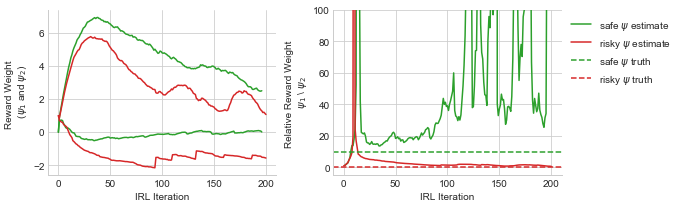

In [109]:
# load data 
phi_r = np.loadtxt('../dqn/cq_irl_riskier_clust1.5_cn15_tiny_tmp0.1_100steps_b/gym/phis.txt')
phi_s = np.loadtxt('../dqn/cq_irl_safer_clust1.5_cn15_tiny_tmp0.1_100steps_b/gym/phis.txt')

#
fig,axes = plt.subplots(1,2,figsize=(8,3))

# plot 1
plt.sca(axes[0])
plt.plot(phi_r[0,:].T,linestyle='-', c=sns.color_palette()[2],label='risky $\psi$')
plt.plot(phi_r[1,:].T,linestyle='-', c=sns.color_palette()[2])
plt.plot(phi_s[0,:].T,linestyle='-', c=sns.color_palette()[3],label='safe $\psi$')
plt.plot(phi_s[1,:].T,linestyle='-', c=sns.color_palette()[3])
plt.xlabel('IRL Iteration')
plt.ylabel('Reward Weight \n ($\psi_1$ and $\psi_2$)')
#plt.legend()

# plot 2
plt.sca(axes[1])
after=0
plt.plot(np.abs(phi_r[0,after:].T/phi_r[1,after:].T),linestyle='-', c=sns.color_palette()[2],label='safe $\psi$ estimate')
plt.plot(np.abs(phi_s[0,after:].T/phi_s[1,after:].T),linestyle='-', c=sns.color_palette()[3],label='risky $\psi$ estimate')
plt.axhline(y=1.0/0.1,label='safe $\psi$ truth', c=sns.color_palette()[2],linestyle='--')
plt.axhline(y=1.0/10.0,label='risky $\psi$ truth', c=sns.color_palette()[3],linestyle='--')
plt.ylim([-5,100])
#axes[1].set_xticks(np.arange(np.shape(phi_r)[1])[after:])
#axes[1].set_xticklabels(np.arange(np.shape(phi_r)[1])[after:])
plt.xlabel('IRL Iteration')
plt.ylabel('Relative Reward Weight \n $ \psi_1 $ \ $ \psi_2 $')


# clean plot 
sns.despine()
plt.legend(loc=2,bbox_to_anchor=[1.0,1.0])
plt.tight_layout()
#plt.savefig('../paper/irl1.png',dpi=300,bbox_inches='tight')

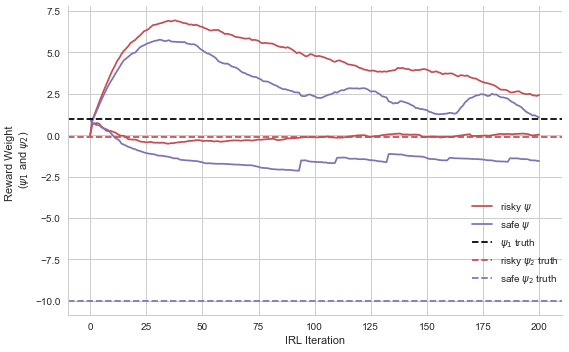

In [15]:
# load data 
sns.set_style("whitegrid")
phi_r = np.loadtxt('../dqn/cq_irl_riskier_clust1.5_cn15_tiny_tmp0.1_100steps_b/gym/phis.txt')
phi_s = np.loadtxt('../dqn/cq_irl_safer_clust1.5_cn15_tiny_tmp0.1_100steps_b/gym/phis.txt')

#
fig,axes = plt.subplots(1,1,figsize=(8,5))

# plot 1
plt.sca(axes)
plt.plot(phi_r[0,:].T,linestyle='-', c=sns.color_palette()[2],label='risky $\psi$')
plt.plot(phi_r[1,:].T,linestyle='-', c=sns.color_palette()[2])
plt.plot(phi_s[0,:].T,linestyle='-', c=sns.color_palette()[3],label='safe $\psi$')
plt.plot(phi_s[1,:].T,linestyle='-', c=sns.color_palette()[3])

plt.axhline(y=1.0,label='$\psi_1$ truth', c='k',linestyle='--')
plt.axhline(y=-0.1,label='risky $\psi_2$ truth', c=sns.color_palette()[2],linestyle='--')
plt.axhline(y=-10.0,label='safe $\psi_2$ truth', c=sns.color_palette()[3],linestyle='--')

plt.xlabel('IRL Iteration')
plt.ylabel('Reward Weight \n ($\psi_1$ and $\psi_2$)')


# clean plot 
sns.despine()
plt.legend(loc=2,bbox_to_anchor=[0.8,0.4])
plt.tight_layout()
#plt.savefig('../paper/irl2.png',dpi=300,bbox_inches='tight')